In [1]:
from keras.datasets import boston_housing

Using TensorFlow backend.


In [2]:
(train_data, train_targets) , (test_data, test_targets) = boston_housing.load_data()

In [3]:
#404 records each has 13 attributes
train_data.shape

(404, 13)

In [4]:
#102 records each has 13 attributes
test_data.shape

(102, 13)

In [5]:
#The targets are the median values of owner-occupied homes, in thousands of dollars
train_targets.shape

(404,)

In [6]:
#mean value of houses
train_targets.mean()

22.395049504950492

In [ ]:
#Per capita crime rate.
#Proportion of residential land zoned for lots over 25,000 square feet.
#Proportion of non-retail business acres per town.
#Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).
#Nitric oxides concentration (parts per 10 million).
#Average number of rooms per dwelling.
#Proportion of owner-occupied units built prior to 1940.
#Weighted distances to five Boston employment centres.
#Index of accessibility to radial highways.
#Full-value property-tax rate per $10,000.
#Pupil-teacher ratio by town.
#1000 * (Bk - 0.63) ** 2 where Bk is the proportion of Black people by town.
#% lower status of the population.

# Normalization

In [7]:
mean = train_data.mean(axis=0)

In [8]:
train_data.shape

(404, 13)

In [9]:
mean.shape

(13,)

In [10]:
#           (404 X 13)  - (13)             
train_data = train_data - mean

In [11]:
train_data.shape

(404, 13)

In [12]:
std = train_data.std(axis=0)

In [13]:
std.shape

(13,)

z-score
x = x - mean
   __________
      std

In [14]:
train_data = train_data/std

In [15]:
test_data = test_data - mean

In [16]:
test_data = test_data/std

In [17]:
test_data.shape

(102, 13)

# Designning the network

In [18]:
from keras import models, layers

In [19]:
model = models.Sequential()

In [20]:
model.add(layers.Dense(64, 
                       activation  = 'relu',
                       input_shape = (train_data.shape[1],)))

In [21]:
model.add(layers.Dense(64,
                       activation = 'relu'))

In [22]:
model.add(layers.Dense(1))

In [23]:
model.compile(optimizer = 'rmsprop',
              loss = 'mse',
              metrics = ['mae'])#mean absolute error

# Validation using K-fold

In [24]:
import numpy as np

In [25]:
k = 4

In [26]:
len(train_data)

404

In [27]:
num_val_samples = len(train_data) // k

In [28]:
num_epochs = 100

In [29]:
all_scores = []

In [30]:
for i in range(k):
    print('processing fold #', i)
    #prepare validation data
    val_data = train_data[i*num_val_samples: (i+1)*num_val_samples]
    val_targets = train_targets[i*num_val_samples: (i+1)*num_val_samples]
    
    #prepare training data
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
         axis=0)
    
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
         axis=0)
    
    # train model in silent mode
    model.fit(partial_train_data, partial_train_targets,
              epochs = num_epochs, batch_size = 1, verbose = 0)
    
    # evaluate the model on validation data
    val_mse , val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [31]:
all_scores

[2.0769381735584522, 2.53411335756283, 1.9058153794543577, 1.4076578699716247]

In [32]:
np.mean(all_scores)

1.9811311951368162

# Saving Validation Logs at each fold

In [33]:
num_epochs = 500
all_mae_histories = []
for i in range(k):
    print('processing fold #', i)
    
    #prepare the validation data
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    
    #prepare the training data: data from all other partitions
    partial_train_data = np.concatenate(
         [train_data[:i*num_val_samples],
         train_data[(i+1) * num_val_samples:]],
         axis = 0)
    
    partial_train_targets = np.concatenate(
    [train_targets[:i * num_val_samples],
     train_targets[(i+1) * num_val_samples:]],
     axis = 0)
    
    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data = (val_data, val_targets),
                        epochs = num_epochs, batch_size = 1, verbose = 0)
    
    mae_history = history.history['val_mean_absolute_error']
    all_mae_histories.append(mae_history)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [34]:
all_mae_histories

[[0.8088586212384818,
  0.6824616913748259,
  1.0051594063787177,
  0.8523132635815309,
  0.7745187400591256,
  0.889851442658075,
  1.0546610426194598,
  0.9675312608775526,
  0.9879861350106721,
  0.9822823883283256,
  1.074986991315785,
  0.9042329693784809,
  1.090658981021088,
  0.9766525136362209,
  0.9532469286777006,
  1.1275980543382098,
  1.2481247646973865,
  1.1508132349146474,
  1.330132031204677,
  0.9970569657807303,
  1.1213612839727118,
  1.1165566586031772,
  1.1277063766328415,
  1.1540169479823348,
  1.2062360980723164,
  1.1724767448878524,
  1.273987297964568,
  1.305198844116513,
  1.284645420489925,
  1.349263328136784,
  1.2533677356077892,
  1.3430942969747108,
  1.245617687112034,
  1.3243875786809638,
  1.3918872351693634,
  1.132839316188699,
  1.3278388693781182,
  1.3056727116650875,
  1.3091519044177367,
  1.3365272767472975,
  1.4927681035334521,
  1.366775385223993,
  1.3881397058468055,
  1.3686020161845895,
  1.4207866640374212,
  1.4400718660637883,

In [35]:
purt = np.asarray(all_mae_histories)

In [36]:
purt.mean()

1.3443768811757022

In [37]:
len(all_mae_histories[1])

500

In [38]:
average_mae_history = [np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

In [39]:
len(average_mae_history)

500

In [40]:
import  matplotlib.pyplot as pt

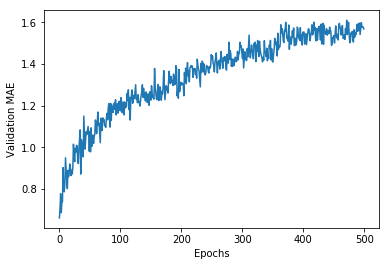

In [41]:
pt.plot(range(len(average_mae_history)), average_mae_history)
pt.xlabel('Epochs')
pt.ylabel('Validation MAE')
pt.show()

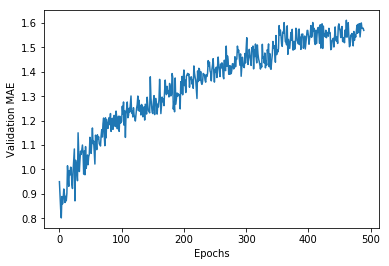

In [42]:
pt.plot(range(len(average_mae_history) - 10), average_mae_history[10:])
pt.xlabel('Epochs')
pt.ylabel('Validation MAE')
pt.show()

In [43]:
model.fit(train_data, train_targets, epochs=150, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

102/102 [==============================] - 0s 38us/step


In [44]:
test_mse_score

13.273691588757085

In [45]:
test_mae_score

2.516722417345234

In [47]:
np.mean(test_mse_score)

13.273691588757085

In [48]:
np.mean(test_mae_score)

2.516722417345234